In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import xlrd3
from scipy.interpolate import make_interp_spline, BSpline

In [8]:
#plt.scatter(x,y,s=2, c='red') - отображает отдельные точки, s=size, c=colour

def mnq(x, y, xerrr, yerrr, xlabel, ylabel, label='', k=0, b=0):
    """
    Строит прямую по методу наименьших квадратов.
    :param x: экспериментальные данные по х
    :param y: экспериментальные данные по у
    :param xlabel: подпись оси х
    :param ylabel: подпись оси y
    :param k: теор прямая
    :param b: теор прямая

    """
    global u
    polynom, error = np.polyfit(x, y, deg=1, cov=True)
    polynom_function = np.poly1d(polynom)
    plt.errorbar(x, y, xerr=xerrr, yerr=yerrr, fmt='g.')
    plt.scatter(x, y, s=20, color = 'green')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    maxi = max(x)
    plt.plot(x, polynom_function(x), label=label + str(polynom_function), color = 'purple')

    if k != 0 or b != 0:
        plt.plot(x, k * x + b)
    plt.grid()
    plt.legend(loc='best', fontsize=12)

    
    print("Уравнение для экспериментальной кривой номер ", str(u), " y = kx + b:", 'y = {}x + {}'.format(polynom_function[1], polynom_function[0]))
    print("Погрешность для k: " + str((error[0][0]) ** 0.5))
    print("Погрешность для b: " + str((error[1, 1]) ** 0.5))
    plt.show()


def add_mnq(x, y, xerrr, yerrr, label=''):
    global u
    polynom, error = np.polyfit(x, y, deg=1, cov=True)
    polynom_function = np.poly1d(polynom)
    plt.errorbar(x, y, xerr=xerrr, yerr=yerrr, fmt='b.')
    plt.scatter(x, y, s=3)
    plt.plot(x, polynom_function(x), label=label + str(polynom_function))
    print("Уравнение для экспериментальной кривой номер ", str(u), " y = kx + b:", 'y = {}x + {}'.format(polynom_function[1], polynom_function[0]))
    print("Погрешность для k: " + str((error[0][0]) ** 0.5))
    print("Погрешность для b: " + str((error[1, 1]) ** 0.5))
    u += 1


def TableV(path, Nrows, Ncolums):
    """
    Считывает данные из вертикальной excel таблицы. Первая строка не считывается, считается что там подпись
    Каждый столбец записывается в отдельный список
    :param: path: путь до таблицы
    :param: Nrows: количество строк в считываемой таблице
    :param: Ncolums: количество столбцов в считываемой таблице
    :return: Список состоящий из Ncolumn списков, в каждый из которых записан отдельный столбец
    
    """
    workbook = xlrd3.open_workbook(path)

    worksheet = workbook.sheet_by_index(0)
    data = []
    for i in range(Ncolums):
        data.append([])
    for i in range(Ncolums):
        for j in range(1, Nrows):
            # Print the cell values with tab space
            data[i].append(worksheet.cell_value(j, i))
    return data


def TableG(path, Nrows, Ncolums):
    """
    Считывает данные из горизонтальной excel таблицы. Первый столбец не считывается, считается что там подпись
    Каждая строка записывается в отдельный список
    :param path: путь до таблицы
    :param: Nrows: количество строк в считываемой таблице
    :param: Ncolums: количество стобцов в считываемой таблице
    :return: Список состоящий из Nrows списков, в каждый из которых записан отдельная строка

    """
    workbook = xlrd3.open_workbook(path)

    worksheet = workbook.sheet_by_index(0)
    data = []
    for i in range(Nrows):
        data.append([])
    for i in range(Nrows):
        for j in range(1, Ncolums):
            # Print the cell values with tab space
            data[i].append(worksheet.cell_value(i, j))
    return data

def curve(x, y, xer, yer, xlabel, ylabel, label=''):#!!!массив для x должен быть отсортирован по возрастанию!!!
    """
    Строит кривую по точкам.
    :param x: массив экспериментальных данных по х
    :param y: массив экспериментальных данных по у
    :param xer: массив погрешностей по x 
    :param yer: массив погрешностей по y
    :param xlabel: подпись оси х
    :param ylabel: подпись оси y
    :param label: подпись графика в легенде

    """
    x = np.array(x)
    y = np.array(y)

    #define x as 200 equally spaced values between the min and max of original x 
    xnew = np.linspace (x. min (), x. max (), 200 ) 

    #define spline
    spl = make_interp_spline(x, y, k = 2)
    y_smooth = spl(xnew)

    #create smooth line chart
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.errorbar(x, y, xerr=xer, yerr=yer, fmt='r.')
    plt.grid()

    plt.plot (xnew, y_smooth, label = label)
    #plt.scatter(x, y, c = 'red')
    
    plt.legend(loc='best', fontsize=12)

    plt.show()
    
    
def add_curve(x, y, xer, yer, label=''): # см комментарии для curve
    x = np.array(x)
    y = np.array(y)

    #define x as 200 equally spaced values between the min and max of original x 
    xnew = np.linspace (x. min (), x. max (), 200 )

    #define spline
    spl = make_interp_spline (x, y, k= 2)
    y_smooth = spl (xnew)

    #create smooth line chart
    #plt.errorbar(x, y, xerr=xer, yerr=yer, fmt='r.') # fmt='r.' чтобы точки были поверх кривой
    plt.scatter(x, y, c = 'red', s = 7)
    plt.plot (xnew, y_smooth, label=label)

u = 1





In [9]:
(1.04/20)*2.0

0.10400000000000001

Уравнение для экспериментальной кривой номер  7  y = kx + b: y = 0.011178600000000006x + -0.5929400000000028
Погрешность для k: 0.00038890003857032165
Погрешность для b: 0.1198670421759033
Уравнение для экспериментальной кривой номер  8  y = kx + b: y = 0.009702800000000004x + -0.4043000000000015
Погрешность для k: 0.00010986998376869341
Погрешность для b: 0.033864203322485395
Уравнение для экспериментальной кривой номер  9  y = kx + b: y = 0.009371000000000004x + -0.5455600000000019
Погрешность для k: 0.0004398355298669461
Погрешность для b: 0.13556641496575408
Уравнение для экспериментальной кривой номер  10  y = kx + b: y = 0.010580200000000003x + -0.7589600000000011
Погрешность для k: 0.00012338011725287695
Погрешность для b: 0.03802830612407944


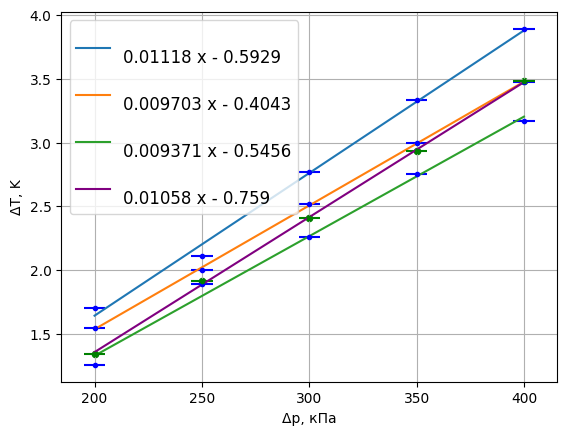

In [12]:
data1 = TableV(os.getcwd() + '\data112.xlsx', 6, 8)
X = data1[0]
Y = data1[1]
X2 = data1[2]
Y2 = data1[3]
X3 = data1[4]
Y3 = data1[5]
X4 = data1[6]
Y4 = data1[7]
erX = []
erY = []
er0 = []
for i in range(5):
    erX.append(5)
    erY.append(0.002)
add_mnq(X2, Y2, erX, erY)
add_mnq(X3, Y3, erX, erY)
add_mnq(X4, Y4, erX, erY)
mnq(X, Y, erX, erY, "Δp, кПа", "ΔТ, K")

